In [21]:
import pandas as pd
import matplotlib as plt
# Set full screen mode
from IPython.core.display import display, HTML
display(HTML('<style>.container { width:100% !important; }</style>'))
import seaborn as sns
from ipywidgets import widgets, interactive
from ipykernel.pylab.backend_inline import flush_figures

import warnings
warnings.filterwarnings("ignore")


path = 'C:/Users/mehra/Desktop/Desktop/UTD Spring 2019/Econ/guns.dta'
data = pd.read_stata(path)

In [163]:
data.tail()

<Figure size 432x288 with 0 Axes>

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1173 entries, 0 to 1172
Data columns (total 13 columns):
year           1173 non-null int8
vio            1173 non-null float32
mur            1173 non-null float32
rob            1173 non-null float32
incarc_rate    1173 non-null int16
pb1064         1173 non-null float32
pw1064         1173 non-null float32
pm1029         1173 non-null float32
pop            1173 non-null float32
avginc         1173 non-null float32
density        1173 non-null float32
stateid        1173 non-null int8
shall          1173 non-null int8
dtypes: float32(9), int16(1), int8(3)
memory usage: 56.1 KB


In [24]:
data.describe()

,year,vio,mur,rob,incarc_rate,pb1064,pw1064,pm1029,pop,avginc,density,stateid,shall
count,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000
mean,88.000000,503.074371,7.665133,161.820374,226.579710,5.336214,62.945473,16.081121,4.816339,13.724799,0.352038,28.960784,0.242967
std,6.636079,334.277039,7.522707,170.509842,178.888094,4.885688,9.761533,1.732143,5.252115,2.554542,1.355472,15.683522,0.429058
min,77.000000,47.000000,0.200000,6.400000,19.000000,0.248207,21.780430,12.213680,0.402753,8.554884,0.000707,1.000000,0.000000
25%,82.000000,283.100006,3.700000,71.099998,114.000000,2.202196,59.939705,14.653370,1.187706,11.934755,0.031911,16.000000,0.000000
50%,88.000000,443.000000,6.400000,124.099998,187.000000,4.026213,65.061279,15.895169,3.271332,13.401551,0.081569,29.000000,0.000000
75%,94.000000,650.900024,9.800000,192.699997,291.000000,6.850673,69.200096,17.525715,5.685611,15.271010,0.177718,42.000000,0.000000
max,99.000000,2921.800049,80.599998,1635.099976,1913.000000,26.979570,76.525749,22.352686,33.145123,23.646713,11.102116,56.000000,1.000000


In [3]:
#Pearson Correlation
cmap=sns.diverging_palette(5, 250, as_cmap=True)
data.corr().style.background_gradient(cmap, axis=1)

,year,vio,mur,rob,incarc_rate,pb1064,pw1064,pm1029,pop,avginc,density,stateid,shall
year,1,0.12145,-0.0330127,-0.0141635,0.504058,0.0686072,-0.0334563,-0.865828,0.0593597,0.525232,-0.00395575,-7.92221e-18,0.379384
vio,0.12145,1,0.826509,0.907077,0.70266,0.569788,-0.573018,-0.169647,0.318966,0.407986,0.664726,-0.317035,-0.20689
mur,-0.0330127,0.826509,1,0.797606,0.709608,0.601833,-0.615368,0.0149792,0.0999223,0.220553,0.748592,-0.242765,-0.179406
rob,-0.0141635,0.907077,0.797606,1,0.56685,0.581202,-0.584192,-0.0860374,0.317193,0.414849,0.781834,-0.250699,-0.212471
incarc_rate,0.504058,0.70266,0.709608,0.56685,1,0.530776,-0.527107,-0.446318,0.0953411,0.461456,0.559313,-0.217131,0.0423743
pb1064,0.0686072,0.569788,0.601833,0.581202,0.530776,1,-0.981978,0.0161908,0.0580758,0.262694,0.543244,-0.310451,-0.183945
pw1064,-0.0334563,-0.573018,-0.615368,-0.584192,-0.527107,-0.981978,1,-0.0126023,-0.0654379,-0.191164,-0.555113,0.311228,0.212338
pm1029,-0.865828,-0.169647,0.0149792,-0.0860374,-0.446318,0.0161908,-0.0126023,1,-0.0975033,-0.527856,-0.0637151,0.00836074,-0.277211
pop,0.0593597,0.318966,0.0999223,0.317193,0.0953411,0.0580758,-0.0654379,-0.0975033,1,0.215202,-0.0780215,-0.0637422,-0.124368
avginc,0.525232,0.407986,0.220553,0.414849,0.461456,0.262694,-0.191164,-0.527856,0.215202,1,0.343284,-0.203481,-3.98932e-05


In [102]:
# Analysis of Average crime rate by State in descending order

grouped = data.groupby(['stateid'])['vio','rob','mur'].mean().reset_index()
grouped.sort_values('vio', ascending=False)

,stateid,vio,rob,mur
8,11,2048.978271,1069.812988,49.273914
9,12,999.234802,313.799988,10.273913
32,36,941.317383,501.778259,10.665217
4,6,877.482605,330.200012,10.991304
20,24,853.634766,349.630432,10.078261
13,17,828.165222,328.347839,9.721739
40,45,800.265198,135.991302,9.817391
18,22,778.439148,221.491302,15.182609
28,32,755.034790,321.191315,12.278261
31,35,743.869568,131.278259,10.178261


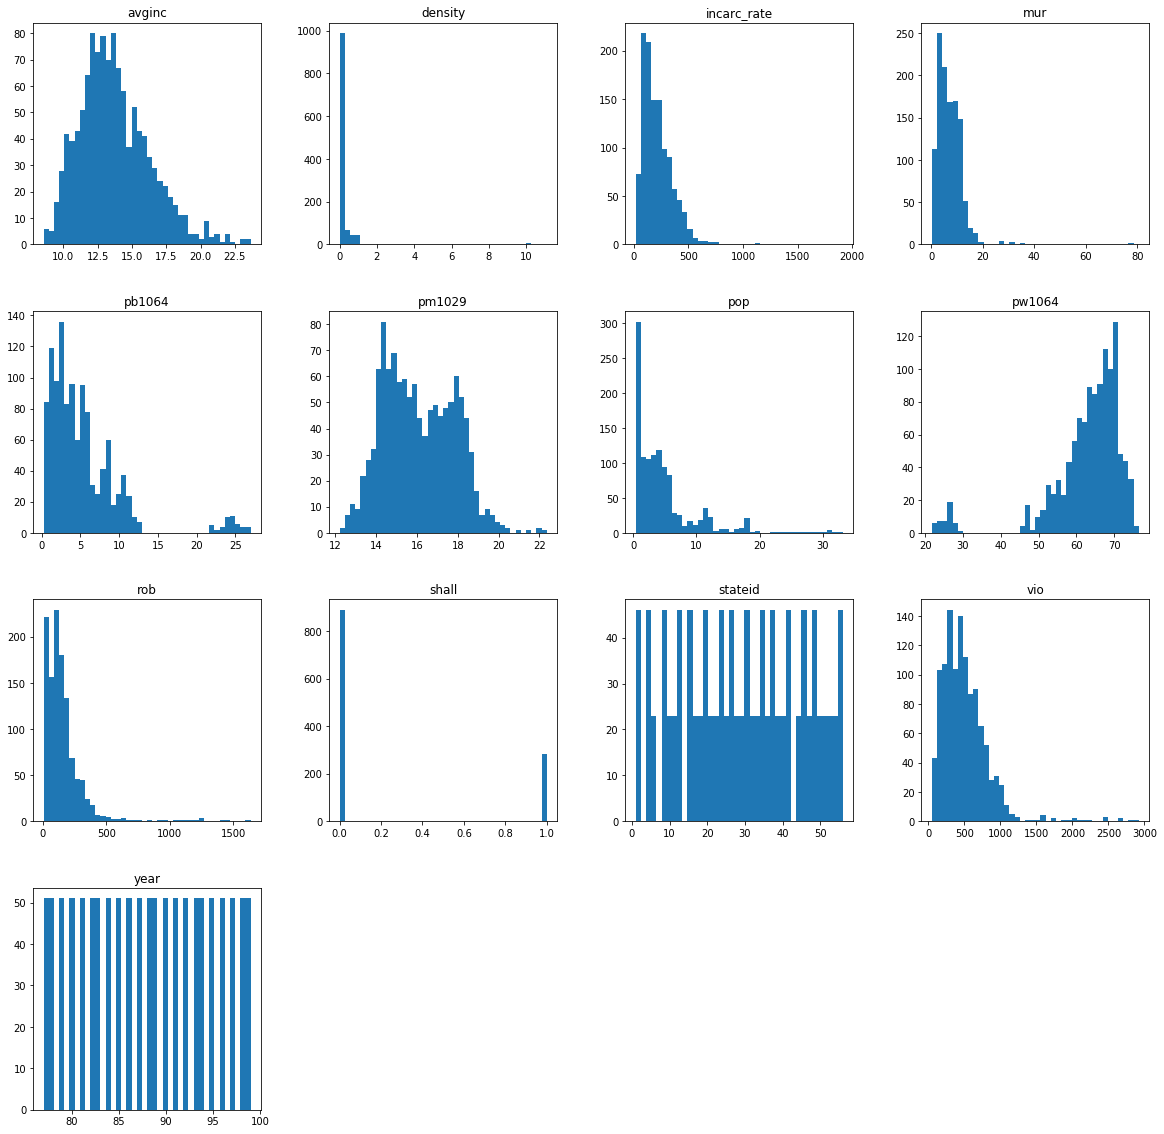

In [166]:
import matplotlib.pyplot as plt
data.hist(grid = False,figsize = (20,20),bins = 40)
plt.show()

In [26]:
## Distribution Plots 
Feature= widgets.Dropdown(options= list(data.columns))
Plot_Type= widgets.RadioButtons(options= ['Distribution Plot','Box Plot'])

def plotit(Feature,Plot_Type):                            

    %matplotlib inline
    plt.figure(figsize = (16,5))
    if Plot_Type == 'Distribution Plot':
        sns.distplot(data[Feature])    
        plt.ylabel('freq')
        plt.title(Feature +' : Distribution')

    elif Plot_Type == 'Box Plot':
        sns.boxplot(x=data[Feature])    
        plt.title(Feature +' : Box Plot')
    flush_figures()
                            
interactive(plotit, Feature=Feature,Plot_Type=Plot_Type)

interactive(children=(Dropdown(description='Feature', options=('year', 'vio', 'mur', 'rob', 'incarc_rate', 'pb…

In [27]:
#Lets see the scatter plots

Select_X= widgets.Dropdown(options= list(data.columns))
Select_Y= widgets.Dropdown(options= list(data.columns))

def plotit_regplt(Select_X,Select_Y):
    plt.figure(figsize = (16,5))
    sns.regplot(x=Select_X, y=(Select_Y),data=data)
    flush_figures()
interactive(plotit_regplt, Select_X=Select_X,Select_Y=Select_Y)


interactive(children=(Dropdown(description='Select_X', options=('year', 'vio', 'mur', 'rob', 'incarc_rate', 'p…

In [28]:
data.columns

Index(['year', 'vio', 'mur', 'rob', 'incarc_rate', 'pb1064', 'pw1064',
       'pm1029', 'pop', 'avginc', 'density', 'stateid', 'shall'],
      dtype='object')

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


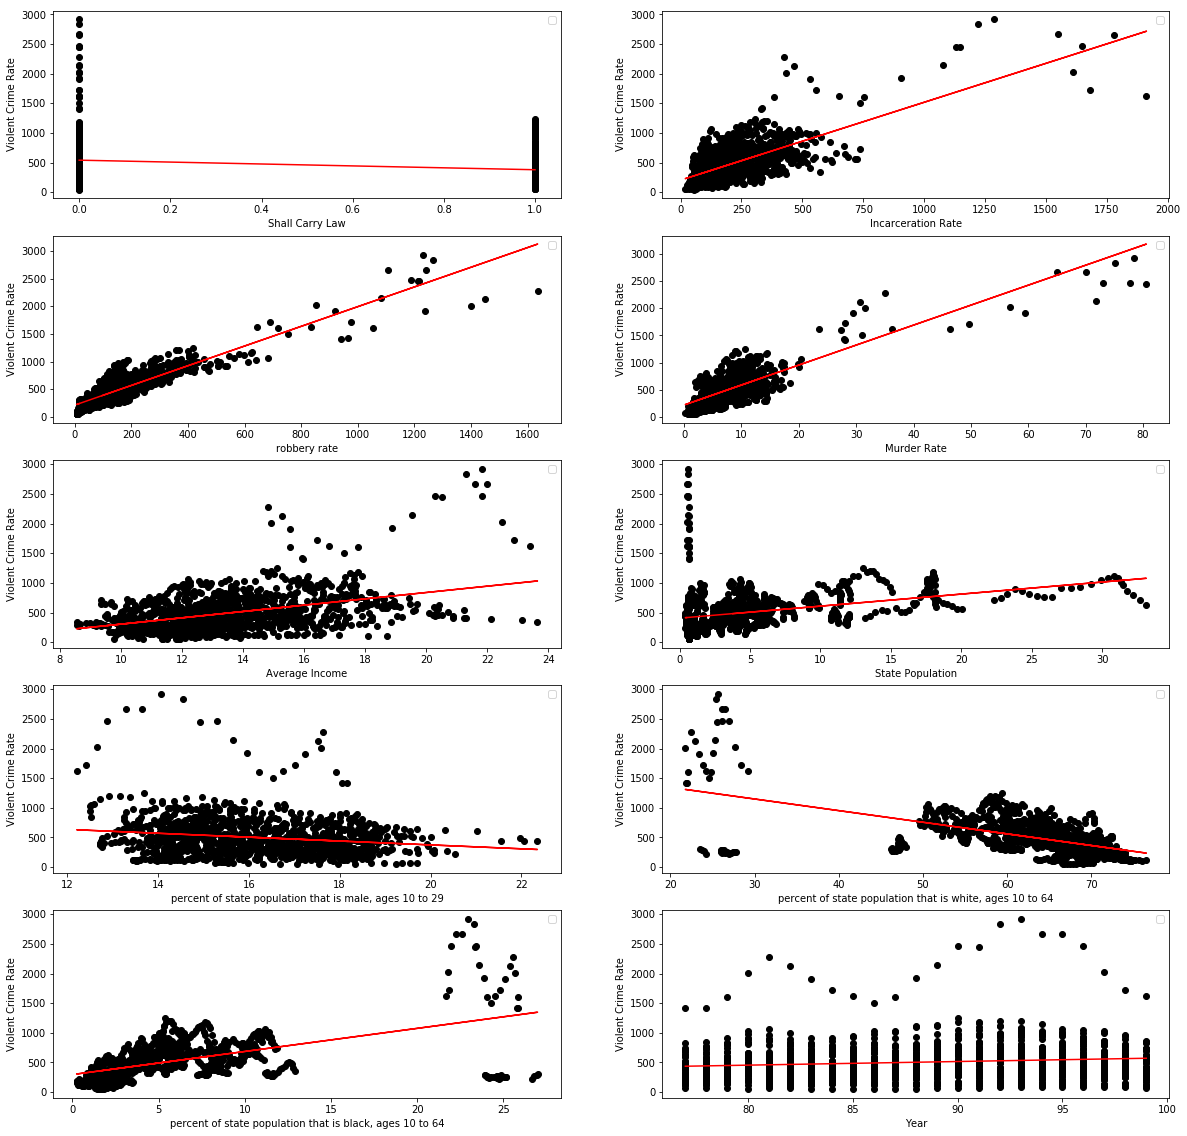

In [167]:
from IPython.display import display
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

y = data['vio'].values.reshape(-1,1)
x1 = data['shall'].values.reshape(-1,1)
x2 = data['incarc_rate'].values.reshape(-1,1)
x3 = data['rob'].values.reshape(-1,1)
x4 = data['mur'].values.reshape(-1,1)
x5 = data['avginc'].values.reshape(-1,1)
x6 = data['pop'].values.reshape(-1,1)
x7 = data['pm1029'].values.reshape(-1,1)
x8 = data['pw1064'].values.reshape(-1,1)
x9= data['pb1064'].values.reshape(-1,1)
x10= data['year'].values.reshape(-1,1)




plt.figure(figsize=(20,20))

plt.subplot(5,2,1)
plt.scatter(x1,y,color='black')
plt.xlabel('Shall Carry Law')
plt.ylabel('Violent Crime Rate')
plt.legend()
model = lm.fit(x1,y)
newy = model.predict(x1)
plt.plot(x1,newy,c='red')

plt.subplot(5,2,2)
plt.scatter(x2,y,color='black')
plt.xlabel('Incarceration Rate')
plt.ylabel('Violent Crime Rate')
plt.legend()
model = lm.fit(x2,y)
newy = model.predict(x2)
plt.plot(x2,newy,c='red')


plt.subplot(5,2,3)
plt.scatter(x3,y,color='black')
plt.xlabel('robbery rate')
plt.ylabel('Violent Crime Rate')
plt.legend()
model = lm.fit(x3,y)
newy = model.predict(x3)
plt.plot(x3,newy,c='red')

plt.subplot(5,2,4)
plt.scatter(x4,y,color='black')
plt.xlabel('Murder Rate')
plt.ylabel('Violent Crime Rate')
plt.legend()
model = lm.fit(x4,y)
newy = model.predict(x4)
plt.plot(x4,newy,c='red')

plt.subplot(5,2,5)
plt.scatter(x5,y,color='black')
plt.xlabel('Average Income')
plt.ylabel('Violent Crime Rate')
plt.legend()
model = lm.fit(x5,y)
newy = model.predict(x5)
plt.plot(x5,newy,c='red')

plt.subplot(5,2,6)
plt.scatter(x6,y,color='black')
plt.xlabel('State Population')
plt.ylabel('Violent Crime Rate')
plt.legend()
model = lm.fit(x6,y)
newy = model.predict(x6)
plt.plot(x6,newy,c='red')

plt.subplot(5,2,7)
plt.scatter(x7,y,color='black')
plt.xlabel('percent of state population that is male, ages 10 to 29')
plt.ylabel('Violent Crime Rate')
plt.legend()
model = lm.fit(x7,y)
newy = model.predict(x7)
plt.plot(x7,newy,c='red')

plt.subplot(5,2,8)
plt.scatter(x8,y,color='black')
plt.xlabel('percent of state population that is white, ages 10 to 64')
plt.ylabel('Violent Crime Rate')
plt.legend()
model = lm.fit(x8,y)
newy = model.predict(x8)
plt.plot(x8,newy,c='red')

plt.subplot(5,2,9)
plt.scatter(x9,y,color='black')
plt.xlabel('percent of state population that is black, ages 10 to 64')
plt.ylabel('Violent Crime Rate')
plt.legend()
model = lm.fit(x9,y)
newy = model.predict(x9)
plt.plot(x9,newy,c='red')

plt.subplot(5,2,10)
plt.scatter(x10,y,color='black')
plt.xlabel('Year')
plt.ylabel('Violent Crime Rate')
plt.legend()
model = lm.fit(x10,y)
newy = model.predict(x10)
plt.plot(x10,newy,c='red')


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


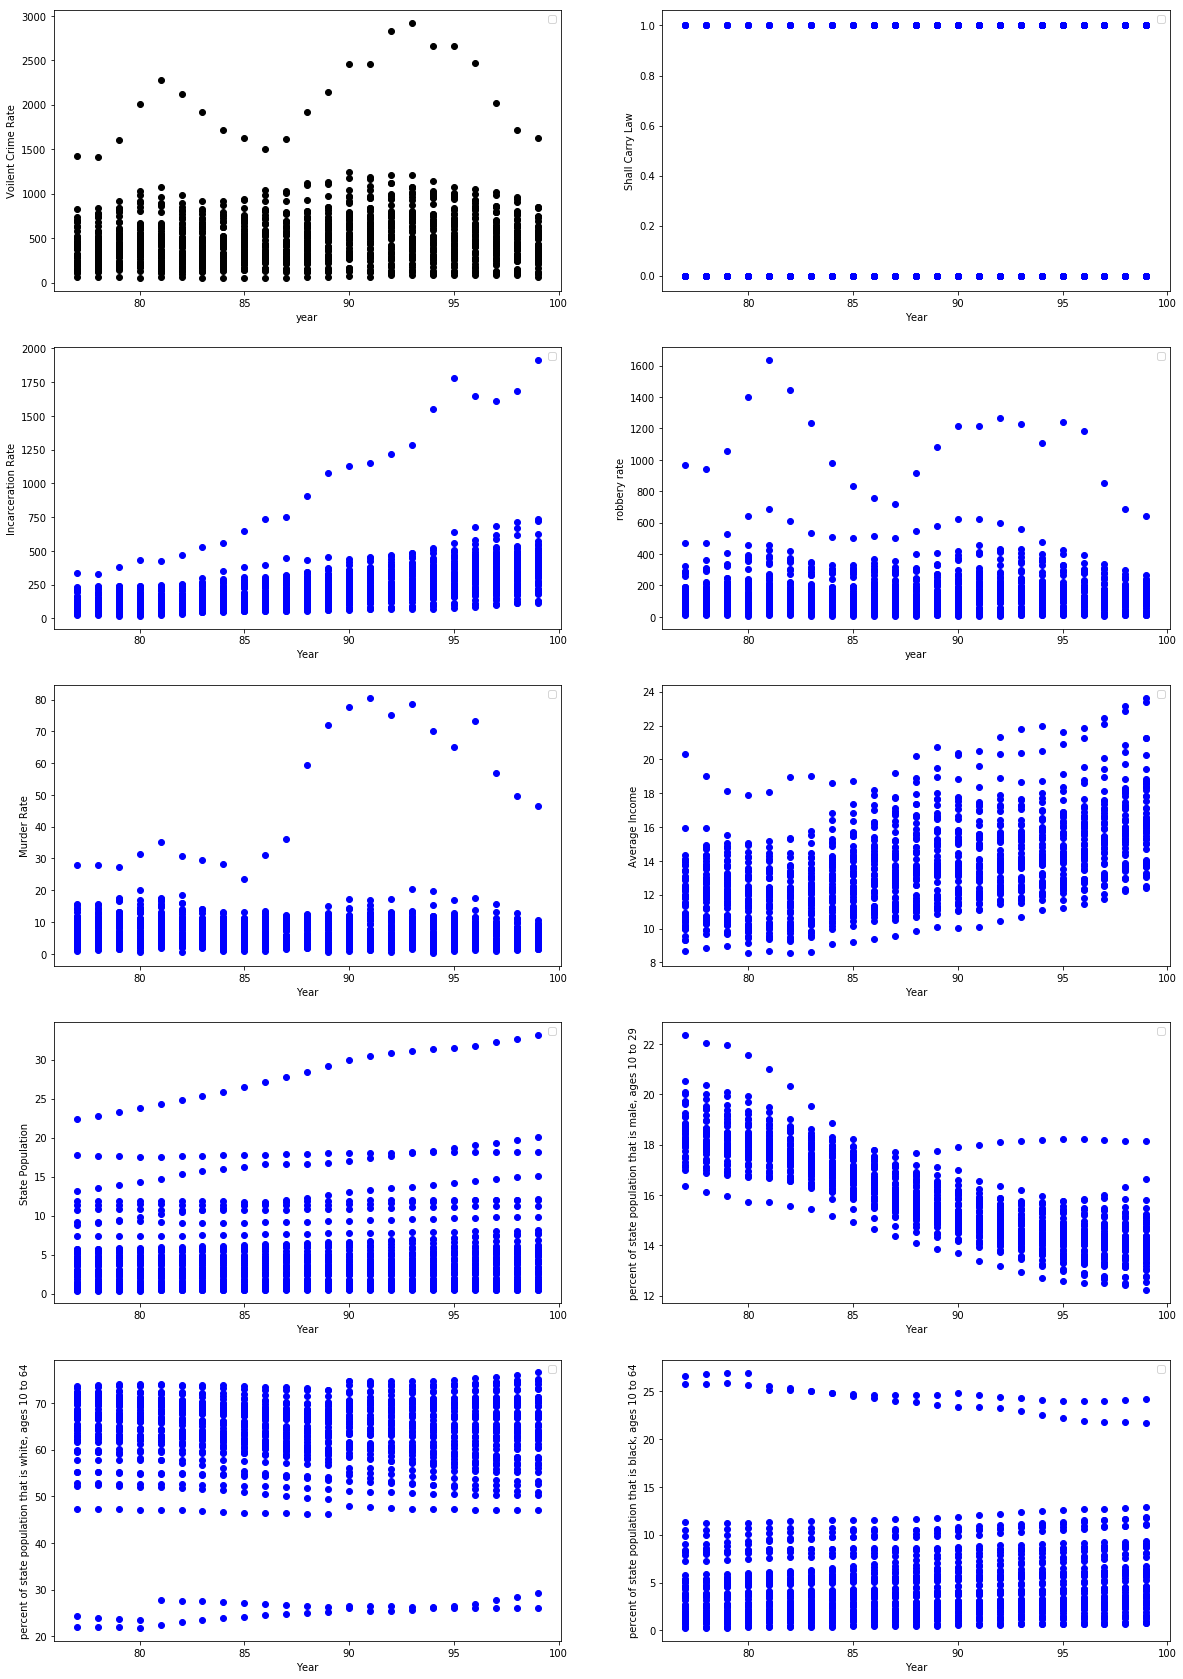

In [214]:
# Plot of various factors over time

from IPython.display import display
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

x = data['year'].values.reshape(-1,1)
y1 = data['vio'].values.reshape(-1,1)
y2 = data['shall'].values.reshape(-1,1)
y3 = data['incarc_rate'].values.reshape(-1,1)
y4 = data['rob'].values.reshape(-1,1)
y5 = data['mur'].values.reshape(-1,1)
y6 = data['avginc'].values.reshape(-1,1)
y7 = data['pop'].values.reshape(-1,1)
y8 = data['pm1029'].values.reshape(-1,1)
y9 = data['pw1064'].values.reshape(-1,1)
y10= data['pb1064'].values.reshape(-1,1)



plt.figure(figsize=(20,30))

plt.subplot(5,2,1)
plt.scatter(x,y1,color='black')
plt.xlabel('year')
plt.ylabel('Voilent Crime Rate')
plt.legend()


plt.subplot(5,2,2)
plt.scatter(x,y2,color='blue')
plt.xlabel('Year')
plt.ylabel('Shall Carry Law')
plt.legend()

plt.subplot(5,2,3)
plt.scatter(x,y3,color='blue')
plt.xlabel('Year')
plt.ylabel('Incarceration Rate')
plt.legend()


plt.subplot(5,2,4)
plt.scatter(x,y4,color='blue')
plt.xlabel('year')
plt.ylabel('robbery rate')
plt.legend()

plt.subplot(5,2,5)
plt.scatter(x,y5,color='blue')
plt.xlabel('Year')
plt.ylabel('Murder Rate')
plt.legend()

plt.subplot(5,2,6)
plt.scatter(x,y6,color='blue')
plt.xlabel('Year')
plt.ylabel('Average Income')
plt.legend()

plt.subplot(5,2,7)
plt.scatter(x,y7,color='blue')
plt.xlabel('Year')
plt.ylabel('State Population')
plt.legend()

plt.subplot(5,2,8)
plt.scatter(x,y8,color='blue')
plt.xlabel('Year')
plt.ylabel('percent of state population that is male, ages 10 to 29')
plt.legend()

plt.subplot(5,2,9)
plt.scatter(x,y9,color='blue')
plt.xlabel('Year')
plt.ylabel('percent of state population that is white, ages 10 to 64')
plt.legend()

plt.subplot(5,2,10)
plt.scatter(x,y10,color='blue')
plt.xlabel('Year')
plt.ylabel('percent of state population that is black, ages 10 to 64')
plt.legend()


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


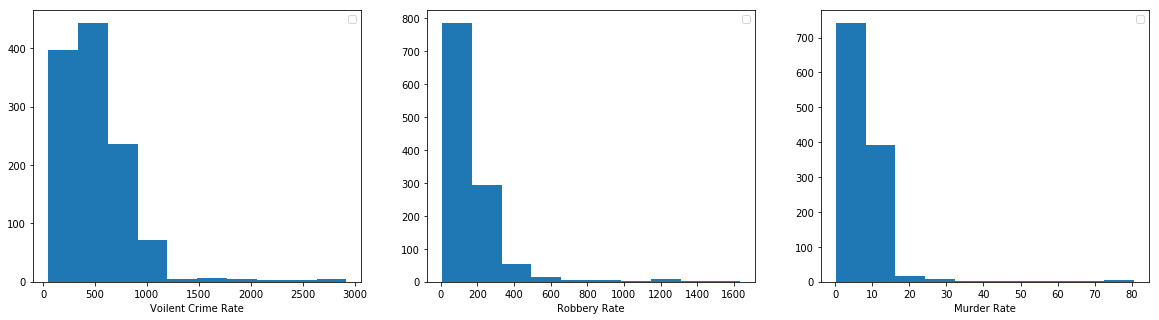

In [95]:
%matplotlib inline

# Histograms for Murder, Robery and Violent Crime Rate

x1 = data['vio']
x2 = data['rob']
x3 = data['mur']

plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.hist(x1)
plt.xlabel('Voilent Crime Rate')
plt.legend()

plt.subplot(1,3,2)
plt.hist(x2)
plt.xlabel('Robbery Rate')
plt.legend()

plt.subplot(1,3,3)
plt.hist(x3)
plt.xlabel('Murder Rate')
plt.legend()


plt.show()




Text(0.5, 1.0, 'Voilent Crime rate across diffrent states over time')

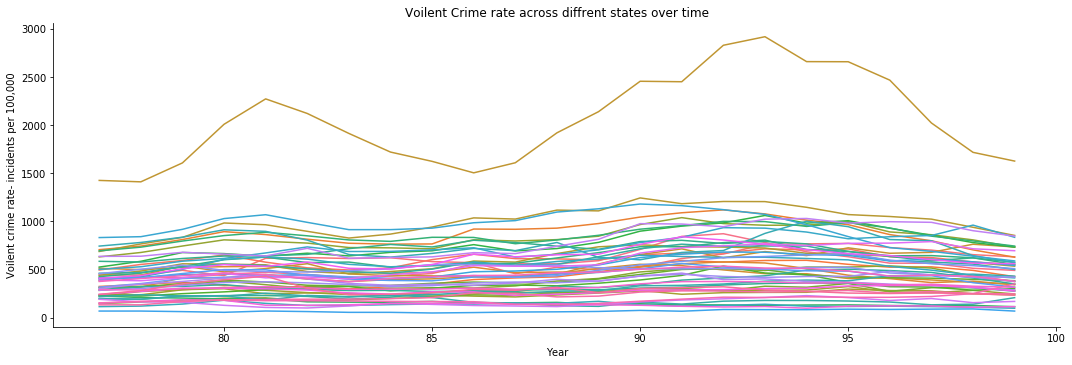

In [169]:
import seaborn

fg = seaborn.FacetGrid(data=data, hue='stateid', height = 5,aspect=3)
fg.map(plt.plot, 'year', 'vio')
plt.xlabel('Year')
plt.ylabel('Voilent crime rate- incidents per 100,000')
plt.title('Voilent Crime rate across diffrent states over time')

Text(0.5, 1.0, 'Robbery rate across diffrent states over time')

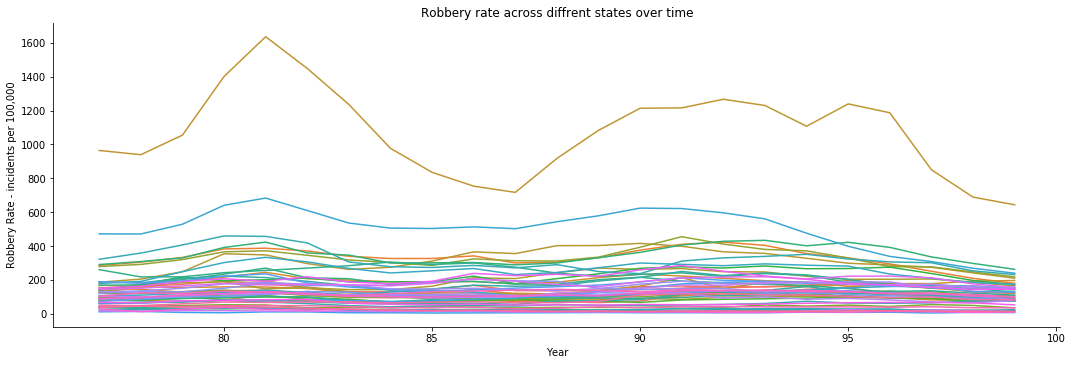

In [160]:
fg = seaborn.FacetGrid(data=data, hue='stateid', height = 5,aspect=3)
fg.map(plt.plot, 'year', 'rob')
plt.xlabel('Year')
plt.ylabel('Robbery Rate - incidents per 100,000')
plt.title('Robbery rate across diffrent states over time')


Text(0.5, 1.0, 'Murder rate across diffrent states over time')

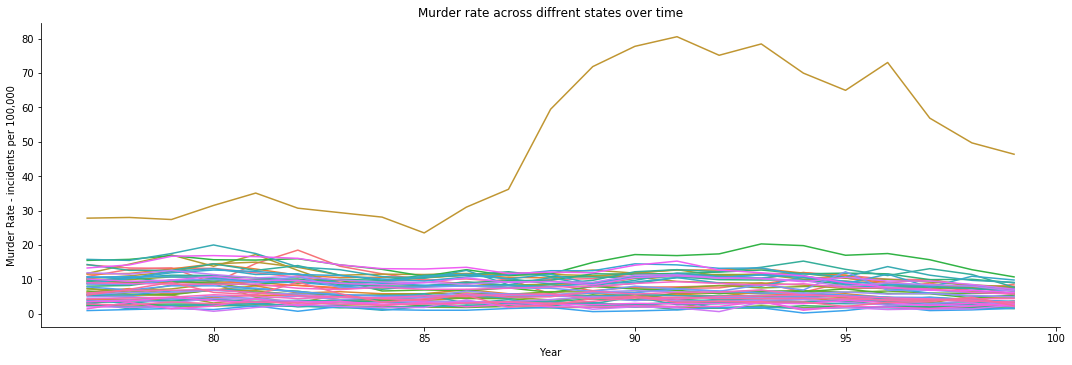

In [162]:
fg = seaborn.FacetGrid(data=data, hue='stateid', height = 5,aspect=3)
fg.map(plt.plot, 'year', 'mur')
plt.xlabel('Year')
plt.ylabel('Murder Rate - incidents per 100,000')
plt.title('Murder rate across diffrent states over time')


In [196]:

# Time PLots 

grouped = data.groupby(['year'])['vio'].mean()

Text(0.5, 1.0, 'AVERAGE VIOLENT CRIME,ROBBERY AND MUDER RATE TREND ACROSS TIME ')

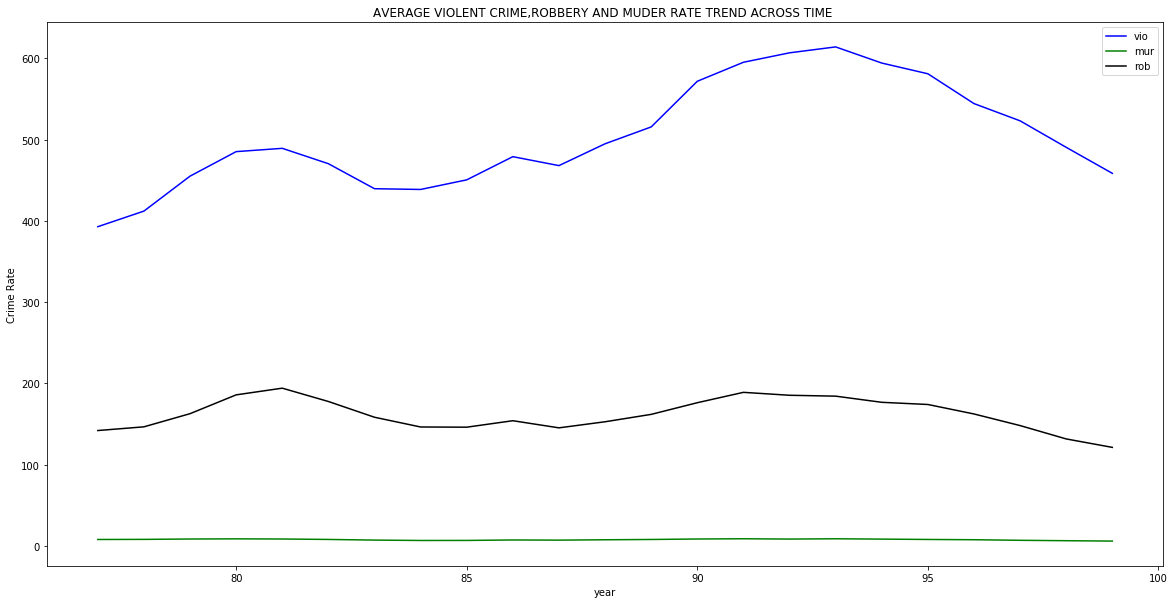

In [213]:
%matplotlib inline

x = data['year']
y1 = data.groupby(['year'])['vio'].mean()
y2 = data.groupby(['year'])['mur'].mean()
y3 = data.groupby(['year'])['rob'].mean()

plt.figure(figsize=(20,10))
plt.plot(y1,color='blue')
plt.xlabel('year')
plt.ylabel('Voilent Crime Rate')
plt.legend()

plt.plot(y2,color='green')
plt.xlabel('year')
plt.ylabel('Murder Rate')
plt.legend()

plt.plot(y3,color='black')
plt.xlabel('year')
plt.ylabel('Crime Rate')
plt.legend()

plt.title('AVERAGE VIOLENT CRIME,ROBBERY AND MUDER RATE TREND ACROSS TIME ')